# Table of Contents

1. [Introduction](#connect-0)
   - [Problem Statement](#connect-1)
   - [Dataset Information](#connect-2)
    
2. [Data Wrangling](#connect-3)
    - [Import Libraries](#connect-4)
    - [Data Cleaning](#connect-5)
3. [Exploratory Data Analysis](#connect-6)
    - [Job vs Duration](#connect-7)
    - [Campaign vs Duration](#connect-8)
    - [Campaign vs month](#connect-9)
    - [Response Factor Analysis](#connect-10)
    - [Yes Response Influence Factor Analysis](#connect-11)
    - [Economic Data Analysis](#connect-12)
4. [Feature Engineering](#connect-13)
    - [Dealing with outliers](#connect-14)
5. [Preprocessing](#connect-15)
    - [Standard Scaling](connect-16)
6. [Modeling](#connect-17)
    - [Logistic Regression](#connect-18)
    - [Decision Tree Classifier - Entropy](#connect-19)
    - [Decision Tree Classifier - Gini](#connect-20)
    - [Naive Bayes CLassifier](#connect-21)
    - [Stochastic Gradient Descent](#connect-22)
    - [K-Nearest Neighbors](#connect-23)
    - [Random Forest](#connect-24)
    - [Vote Classifier](#connect-25)
7. [Conclusion](#connect-26)
8. [Bonus Model](#connect-27)


<a id="connect-0"></a>
## Introduction<br>

<img src='https://img.freepik.com/free-vector/isometric-money-saving-concept-background_52683-6820.jpg?size=626&ext=jpg'></img>

<a id="connect-1"></a>
### Problem Statement<br>
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

<a id="connect-2"></a>
### Data Set Information:<br>
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
https://archive.ics.uci.edu/ml/datasets/bank+marketing
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:<br><br>
Input variables:<br>
bank client data:<br>
Numeric Attributes:<br>
1 - age <br>
2 - duration: last contact duration, in seconds.<br>
3 - campaign: number of contacts performed during this campaign and for this client.<br>
4 - pdays: number of days that passed by after the client was last contacted from a previous campaign<br>
5 - previous: number of contacts performed before this campaign and for this client <br>
<b>social and economic context attributes</b><br>
6 - emp.var.rate: employment variation rate - quarterly indicator <br>
7 - cons.price.idx: consumer price index - monthly indicator <br>
8 - cons.conf.idx: consumer confidence index - monthly indicator <br>
9 - euribor3m: euribor 3 month rate - daily indicator <br>
10 - nr.employed: number of employees - quarterly indicator <br>

Categorical Attributes:<br><br>
1 - job : type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
2 - marital : marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
3 - education ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
4 - default: has credit in default? ('no','yes','unknown')<br>
5 - housing: has housing loan? ('no','yes','unknown')<br>
6 - loan: has personal loan? ('no','yes','unknown')<br>
related with the last contact of the current campaign:<br>
7 - contact: contact communication type ('cellular','telephone')<br>
8 - month: last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
9 - day_of_week: last contact day of the week ('mon','tue','wed','thu','fri')<br>
10 - poutcome: outcome of the previous marketing campaign ('failure','nonexistent','success')<br>

<a id="connect-3"></a>
## Data Wrangling<br>
<a id="connect-4"></a>
### Import Libraries<br>

In [1]:
# Data Manipulation Libraries
import os
import pandas as pd
import numpy as np

# Vizualization Libraries
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# pre-processing
from sklearn.preprocessing import StandardScaler

# ML model Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import warnings
warnings.filterwarnings('ignore')


<a id="connect-5"></a>
### Data Cleaning

In [2]:
bank_data = pd.read_csv('../input/bank-marketing-campaigns-dataset/bank-additional-full.csv',sep=';',engine='python')

In [3]:
# Pandas Profiling - Enable if needed
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)
# profile.to_notebook_iframe()
# profile.to_file('initial_report.html')

In [4]:
bank_data_with_unknowns = bank_data.copy()
#Drop Duplicate rows
bank_data_with_unknowns.drop_duplicates(subset=None, keep='first', inplace=True)
bank_data_with_unknowns.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


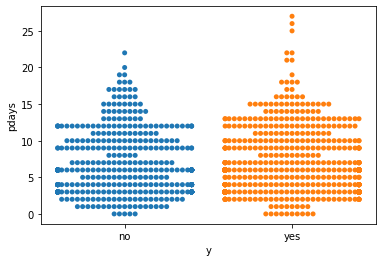

In [5]:
bank_data_with_unknowns['pdays'].value_counts()
bank_pdays = bank_data_with_unknowns.loc[bank_data_with_unknowns['pdays'] == 999,'y']
bank_pdays.value_counts()
bank_not_pdays = bank_data_with_unknowns.loc[bank_data_with_unknowns['pdays'] != 999,['y','pdays']]
#sns.violinplot(x='y',y='pdays',data=bank_not_pdays)
sns.swarmplot(x='y',y='pdays',data=bank_not_pdays)

Insights:<br>
    As we can see that huge number of data is '999' meaning the client was not previously contacted. In the cases where the client was previously contacted, which is a very small fraction of the entire data,'No' and 'Yes' is almost same. So we can drop this column, as it isnt contributing any value for the prediction.

In [6]:
#dropping column pdays
bank_data_with_unknowns.drop(columns=['pdays'],inplace=True)

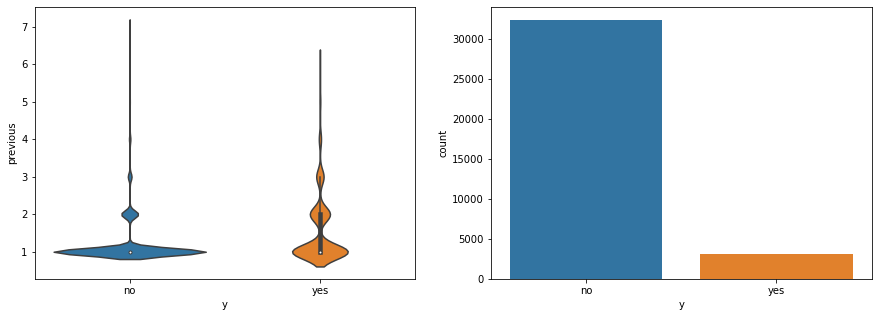

In [7]:
#Checking if we need the column 'previous'
bank_data_with_unknowns['previous'].value_counts()
#zero contributes to 86.3% of the data.
plt.figure(figsize=(15,5))
plt.subplot(121)
bank_not_previous =  bank_data_with_unknowns.loc[bank_data_with_unknowns['previous'] != 0,['y','previous']]
sns.violinplot(x='y',y='previous',data=bank_not_previous)
plt.subplot(122)
bank_previous =  bank_data_with_unknowns.loc[bank_data_with_unknowns['previous'] == 0,['y','previous']]
sns.countplot(x='y',data=bank_previous)

In [8]:
#Percentage of yes and no
bnp = bank_not_previous['y'].value_counts()
print(bnp['yes']/bnp['no'])
bp = bank_previous['y'].value_counts()
print(bp['yes']/bp['no'])

0.36330586524478914
0.09688068865508624


Ingights: <br>
There seems to be some difference, a contributing factor. So we will keep this variable.

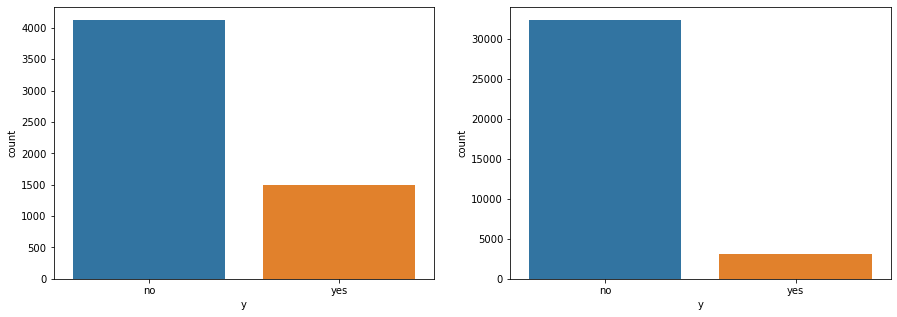

In [9]:
#Checking if we need the column 'poutcome'
bank_data_with_unknowns['poutcome'].value_counts()
#zero contributes to 86.3% of the data.
plt.figure(figsize=(15,5))
plt.subplot(121)
bank_not_nonexistent =  bank_data_with_unknowns.loc[bank_data_with_unknowns['poutcome'] != 'nonexistent',['y']]
sns.countplot(x='y',data=bank_not_nonexistent)
plt.subplot(122)
bank_nonexistent =  bank_data_with_unknowns.loc[bank_data_with_unknowns['poutcome'] == 'nonexistent',['y']]
sns.countplot(x='y',data=bank_nonexistent)


In [10]:
#Percentage of yes and no
bnne = bank_not_nonexistent['y'].value_counts()
print(bnne['yes']/bnne['no'])
bne = bank_nonexistent['y'].value_counts()
print(bne['yes']/bne['no'])

0.36330586524478914
0.09688068865508624


Insights:<br>
There is some significant difference, since we are keeping 'previous' column, lets keep 'poutcome' as well.

In [11]:
#handling job unknown values
bank_data_with_unknowns['job'].value_counts()
bank_data_with_unknowns['job'] = bank_data_with_unknowns['job'].str.replace('.','')
bank_data_with_unknowns['job'] = bank_data_with_unknowns['job'].str.replace('-','')
bank_data_with_unknowns.loc[bank_data_with_unknowns['job'] == 'unknown','job'] = 'admin'

In [12]:
#Handling marital unknown values
bank_data_with_unknowns['marital'].value_counts()
bank_data_with_unknowns.loc[bank_data_with_unknowns['marital'] == 'unknown','marital'] = 'married'

In [13]:
#handling education
bank_data_with_unknowns['education'].value_counts()
bank_data_with_unknowns.loc[bank_data_with_unknowns['education'] == 'basic.9y','education'] = 'basic'
bank_data_with_unknowns.loc[bank_data_with_unknowns['education'] == 'basic.6y','education'] = 'basic'
bank_data_with_unknowns.loc[bank_data_with_unknowns['education'] == 'basic.4y','education'] = 'basic'
bank_data_with_unknowns['education'] = bank_data_with_unknowns['education'].str.replace('.','')
bank_data_with_unknowns['education'].value_counts()

#converting the unknown values to basic instead of university degree
bank_data_with_unknowns.loc[bank_data_with_unknowns['education'] == 'unknown','education'] = 'basic'

In [14]:
#Dropping default column as it dosent contribute to any useful info
bank_data_with_unknowns.drop(columns=['default'],inplace=True)

In [15]:
#handling unknows in housing as yes as it has the highest frequency
bank_data_with_unknowns.loc[bank_data_with_unknowns['housing'] == 'unknown','housing'] = 'yes'

In [16]:
#handling unknows in loan as no as it has the highest frequency
bank_data_with_unknowns.loc[bank_data_with_unknowns['loan'] == 'unknown','loan'] = 'no'

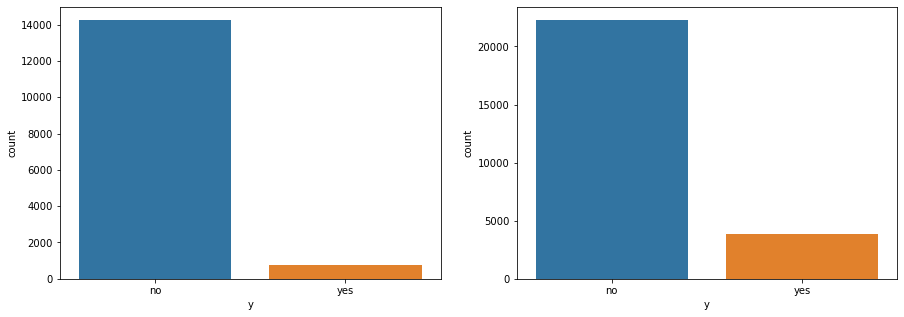

In [17]:
#Contribution of contact
plt.figure(figsize=(15,5))
plt.subplot(121)
bank_telephone =  bank_data_with_unknowns.loc[bank_data_with_unknowns['contact'] == 'telephone',['y']]
sns.countplot(x='y',data=bank_telephone)
plt.subplot(122)
bank_cellular =  bank_data_with_unknowns.loc[bank_data_with_unknowns['contact'] == 'cellular',['y']]
sns.countplot(x='y',data=bank_cellular)

In [18]:
bt = bank_telephone['y'].value_counts()
bc = bank_cellular['y'].value_counts()
print(bt['yes']/bt['no'],bc['yes']/bc['no'])

0.0552125719096394 0.17286720818561235


In [19]:
#the responses 'yes' & 'no' are almost similarly distributed so dropping this column
bank_data_with_unknowns.drop(columns=['contact'],inplace=True)

In [20]:
#handling duration -  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
#dropped rows where duration was zero (4 rows)
bank_data_with_unknowns = bank_data_with_unknowns[~(bank_data_with_unknowns['duration']==0)] 

In [21]:
#clearly it is a contributing factor - so lets deal with the outliers
px.box(bank_data_with_unknowns,x='y',y='duration')
#duration can be classified as greater_than_1600, greater_than_800, greater_than_400 and less_than_400 - data needs to be capped, we will do that later

In [22]:
#Handling campaign
px.violin(bank_data_with_unknowns,x='y',y='campaign')
#Distribution is significantly different so we will keep this variable - values greater than 10 could be capped

<a id="connect-6"></a>
## Exploratory Data Analysis
<a id="connect-7"></a>
### Job vs Duration of calls

In [23]:
#we have handled all unknowns so
bank_eda_data = bank_data_with_unknowns.copy() 
job_vs_duration = px.box(bank_eda_data, x="duration", y="job", color="y",notched=True,template='simple_white',color_discrete_sequence=px.colors.qualitative.Pastel)
job_vs_duration.update_traces(quartilemethod="exclusive",orientation='h') #Quantile at 2.5 and 7.5
job_vs_duration.show()

<a class="anchor" id="first-bullet"></a>

<a id="connect-8"></a>
### Campaign vs Duration of calls

In [24]:
#Campaign vs duration calls
campaign_vs_duration = px.scatter(bank_eda_data, x="campaign", y="duration",color='y',template='simple_white',color_discrete_sequence=px.colors.qualitative.Pastel)
campaign_vs_duration.show()

<a id="connect-9"></a>
### Campaign vs Month

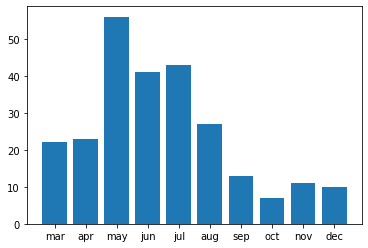

In [25]:
#campaign vs month
campaign_vs_month = bank_eda_data.copy()
sort_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
campaign_vs_month.month = campaign_vs_month.month.astype("category")
campaign_vs_month.month.cat.set_categories(sort_order, inplace=True)
campaign_vs_month = campaign_vs_month.sort_values(['month'])
plt.bar(campaign_vs_month['month'],campaign_vs_month['campaign'])
plt.show()

Insights:
    Campaign activity is high during May and slowly decays by the  end of the year. March and Apirl sees almost half the activity in may.
    

<a id="connect-10"></a>
### Response Factor Analysis

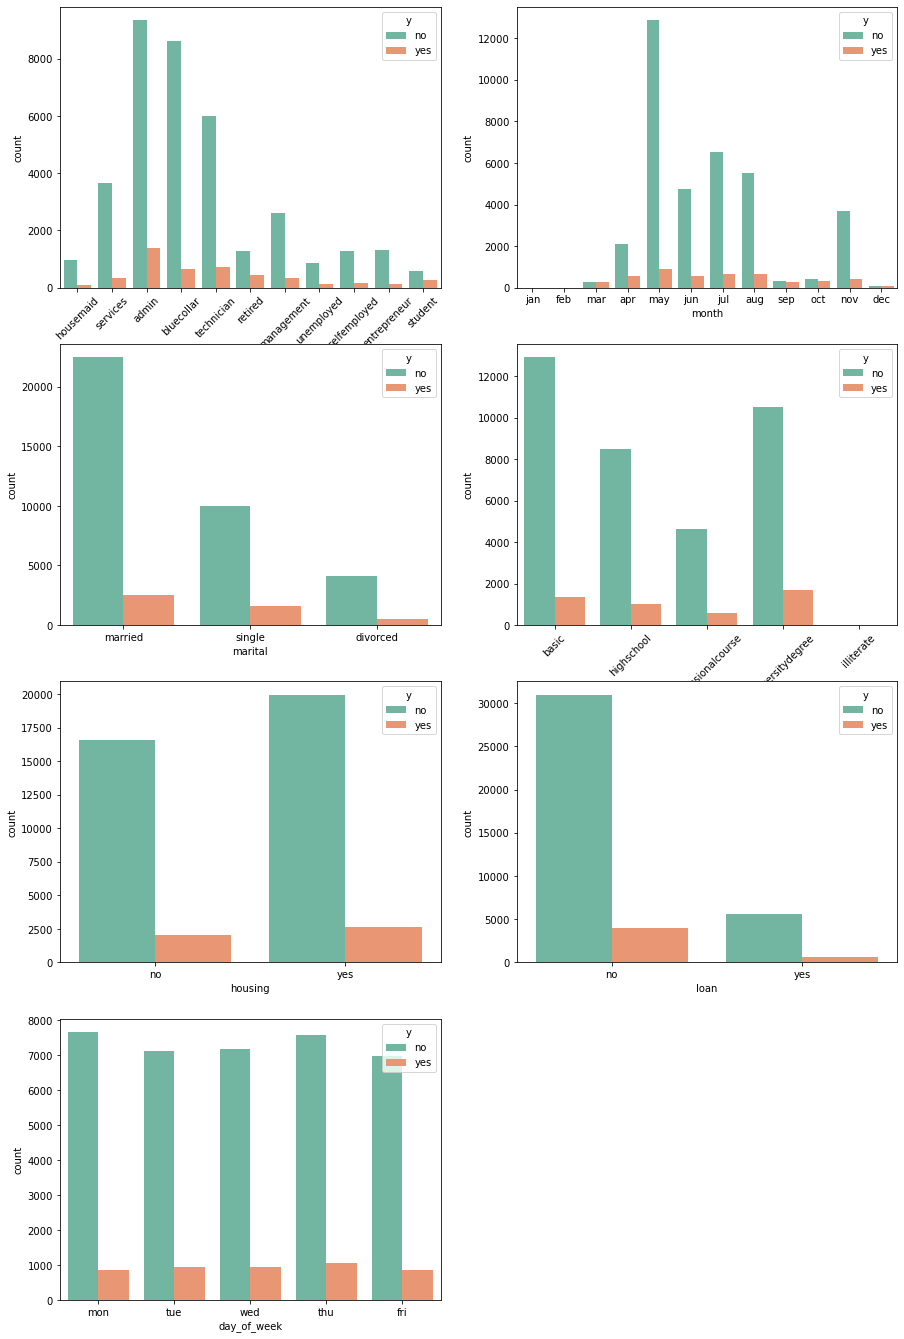

In [26]:
#Yes and No vs (Job, Month, Marital status, Education, Day of week, Housing, Contact, default)

plt.figure(figsize = (15, 30))
sx = plt.subplot(5,2,1)
sns.countplot(x="job",hue="y", data=bank_eda_data, palette="Set2")
sx.set_xticklabels(sx.get_xticklabels(),rotation=45)
sx = plt.subplot(5,2,2)

bde_copy = bank_eda_data.copy()
bde_copy.month = bde_copy.month.astype("category")
bde_copy.month.cat.set_categories(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], inplace=True)

sns.countplot(x="month",hue="y", data=bde_copy.sort_values(['month']), palette="Set2")
sx = plt.subplot(5,2,3)
sns.countplot(x="marital",hue="y", data=bde_copy, palette="Set2")
sx = plt.subplot(5,2,4)
sns.countplot(x="education",hue="y", data=bde_copy, palette="Set2")
sx.set_xticklabels(sx.get_xticklabels(),rotation=45)
sx = plt.subplot(5,2,5)
sns.countplot(x="housing",hue="y", data=bde_copy, palette="Set2")
sx = plt.subplot(5,2,6)
sns.countplot(x="loan",hue="y", data=bde_copy, palette="Set2")
sx = plt.subplot(5,2,7)
sns.countplot(x="day_of_week",hue="y", data=bde_copy, palette="Set2")

Insights:<br>
1. May, June, July, August & November where the months the campaigns were actively performed.<br>
2. Admins, Technitions and people with jobs in services, management and blue-collar jobs were targeted for the campaigns.<br>
3. Married and single people are more likely to deposit. <br>
4. People with high-school, professional course or university degree are more likely to deposit. <br>
5. Loan, housing, contact, day of the week, default don't really contribute much to drawing any conclusions. <br>

<a id="connect-11"></a>
### Yes response influence analysis

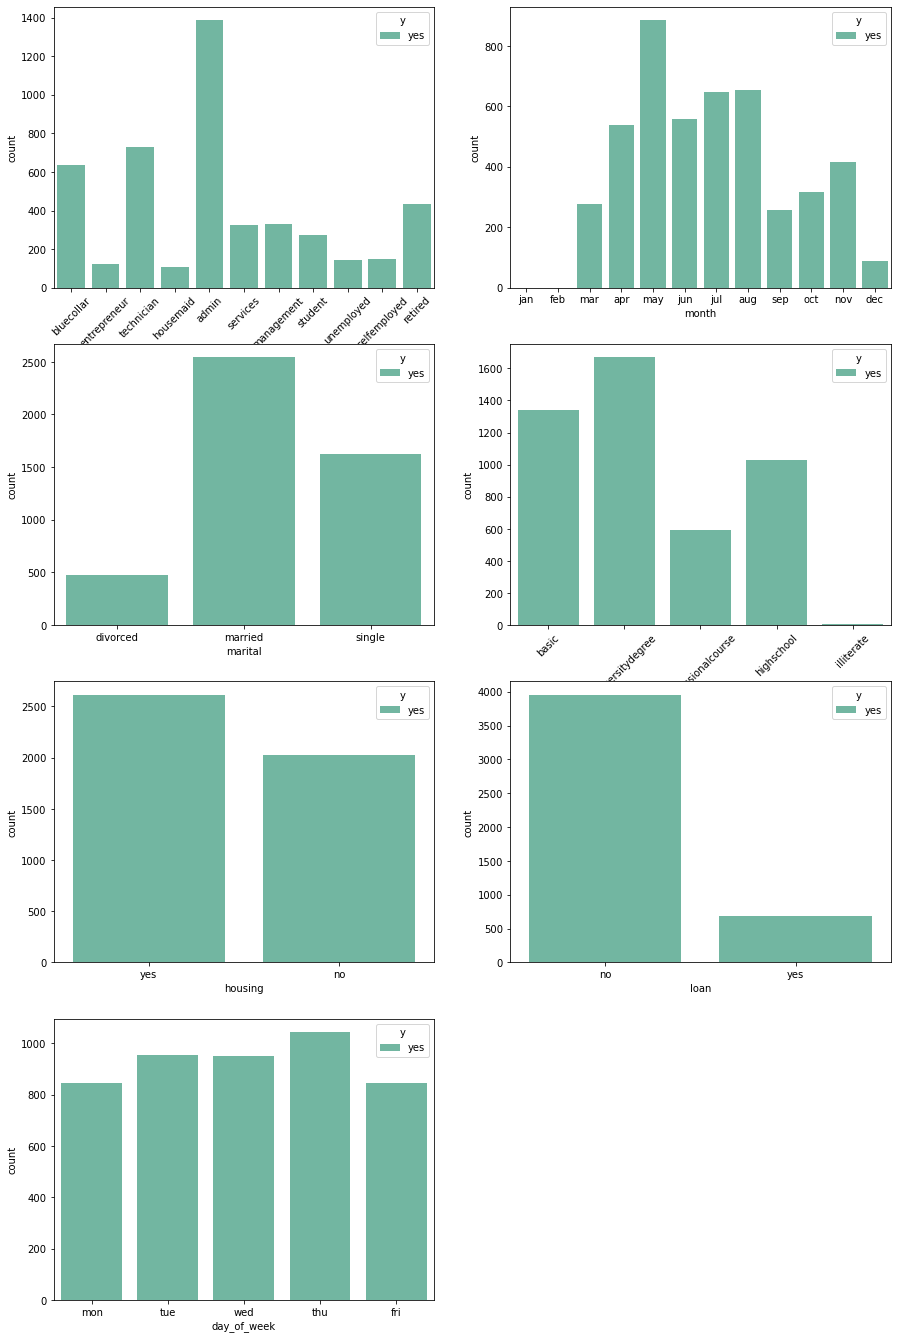

In [27]:
# Only - Yes vs (Job, Month, Marital status, Education, Day of week, Housing)

plt.figure(figsize = (15, 30))
bank_only_yes = bank_eda_data.copy()
bank_only_yes = bank_only_yes[bank_only_yes['y']=='yes']
sx2 = plt.subplot(5,2,1)
sns.countplot(x="job",hue="y", data=bank_only_yes, palette="Set2")
sx2.set_xticklabels(sx2.get_xticklabels(),rotation=45)
sx2 = plt.subplot(5,2,2)

bde_only_yes_copy = bank_only_yes.copy()
bde_only_yes_copy.month = bde_copy.month.astype("category")
bde_only_yes_copy.month.cat.set_categories(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], inplace=True)

sns.countplot(x="month",hue="y", data=bde_only_yes_copy.sort_values(['month']), palette="Set2")
sx2 = plt.subplot(5,2,3)
sns.countplot(x="marital",hue="y", data=bank_only_yes, palette="Set2")
sx2 = plt.subplot(5,2,4)
sns.countplot(x="education",hue="y", data=bank_only_yes, palette="Set2")
sx2.set_xticklabels(sx2.get_xticklabels(),rotation=45)
sx2 = plt.subplot(5,2,5)
sns.countplot(x="housing",hue="y", data=bank_only_yes, palette="Set2")
sx2 = plt.subplot(5,2,6)
sns.countplot(x="loan",hue="y", data=bank_only_yes, palette="Set2")
sx2 = plt.subplot(5,2,7)
sns.countplot(x="day_of_week",hue="y", data=bank_only_yes, palette="Set2")

#Insights : <br>
1. Retired people and people with blue-collar, technitian and admin jobs contribute to the majority of the deposits. <br>
2. April to August including November contributes to highest deposits. <br>
3. poeple without loans at the bank tend to have contributed more to the deposits. <br>
4. cellular contacts and people with no defaults are more favorable.<br>

<a id="connect-12"></a>
### Economic Data analysis

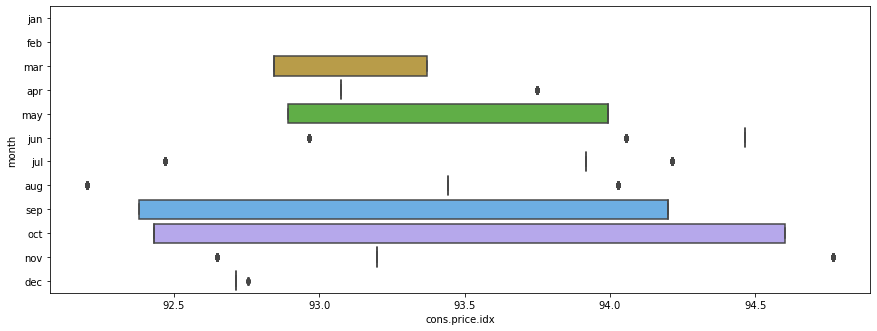

In [28]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14.7, 5.27)
sns.boxplot(x='cons.price.idx',y='month',data=bde_copy,ax=ax)

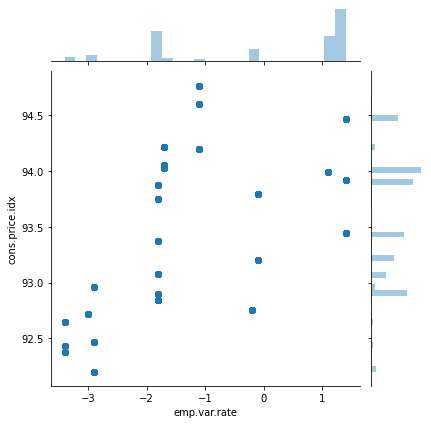

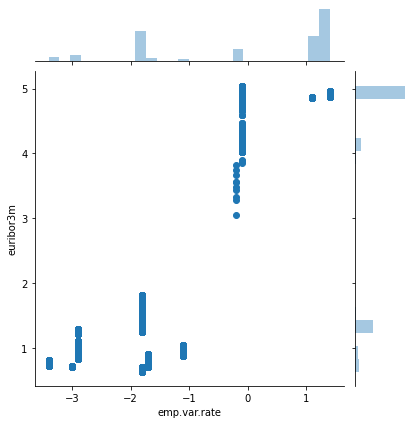

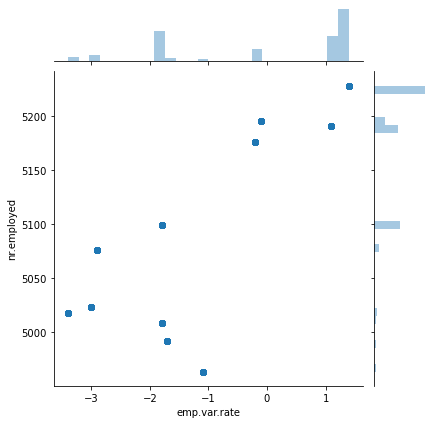

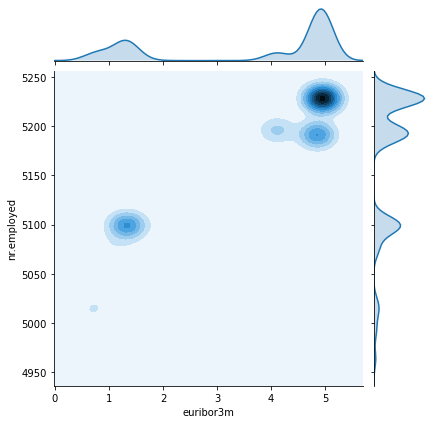

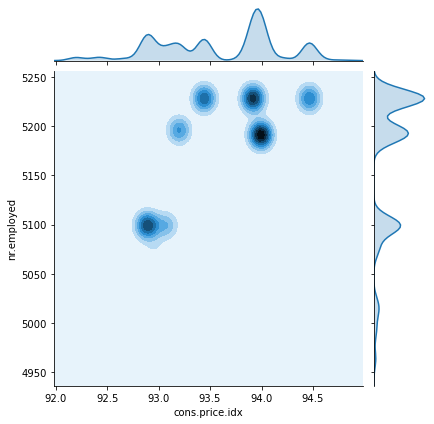

In [29]:
sns.jointplot(x ='emp.var.rate', y ='cons.price.idx', data = bank_eda_data) 
sns.jointplot(x ='emp.var.rate', y ='euribor3m', data = bank_eda_data) 
sns.jointplot(x ='emp.var.rate', y ='nr.employed', data = bank_eda_data) 
sns.jointplot(x ='euribor3m', y ='nr.employed', data = bank_eda_data, kind ='kde') 
sns.jointplot(x ='cons.price.idx', y ='nr.employed', data = bank_eda_data, kind ='kde') 

Insights:
1. As the euribor interest rates increased, employee variation rate also increased. Higher the euribor interest rates more number of people were employed.(More on https://www.global-rates.com/en/interest-rates/euribor/euribor-interest-3-months.aspx)<br>
2. More the number of people employed, higher the consumer price index.<br>
3. Jun, July and August had high employment rate.<br>
4. After the fluctuation in september and October, the employment reduced towards the end of the year. Explains the small increase in November and drop in December.<br>

<a id="connect-13"></a>
## Feature Engineering

<a id="connect-14"></a>
### Dealing with outliers

Text(0.5, 1.0, 'campaign')

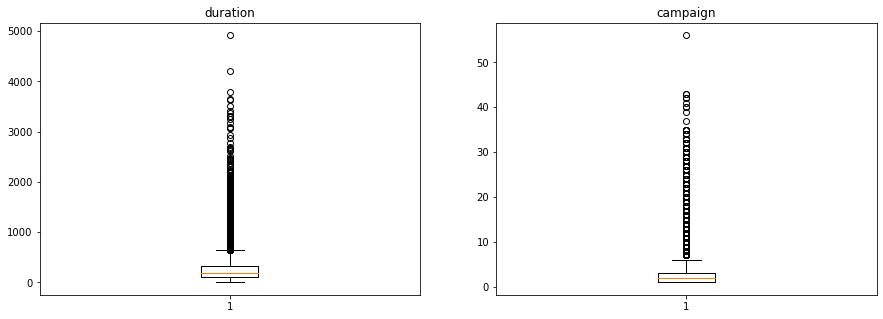

In [30]:
#Checking for outliers in data
plt.figure(figsize = (15, 5))
ax=plt.subplot(121)
plt.boxplot(bank_eda_data['duration'])
ax.set_title('duration')
ax=plt.subplot(122)
plt.boxplot(bank_eda_data['campaign'])
ax.set_title('campaign')


In [31]:
# We choose not to perform any outlier filtering as the values observed are not so extreme. Although its optional if you see fit.
# #We can directly apply interquantile range filter for duration and campaign.
# numerical_features=['campaign','duration']
# for cols in numerical_features:
#     Q3 = bank_eda_data[cols].quantile(0.95)
#     Q1 = bank_eda_data[cols].quantile(0.05)
#     IQR = Q3 - Q1
#     filter = (bank_eda_data[cols] <= (Q3 + 1.5 *IQR))
#     bank_eda_data=bank_eda_data.loc[filter]

# #replotting after applying filter
# plt.figure(figsize = (5, 5))

# ax3=plt.subplot(121)
# plt.boxplot(bank_eda_data['duration'])
# ax3.set_title('duration')

# ax3=plt.subplot(122)
# plt.boxplot(bank_eda_data['campaign'])
# ax3.set_title('campaign')

In [32]:
bank_eda_data['previous'].value_counts()

0    35547
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

<a id="section-one"></a>

In [33]:
bank_eda_data.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
month              object
day_of_week        object
duration            int64
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [34]:
bank_eda_data.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,highschool,no,no,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,highschool,yes,no,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic,no,no,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,highschool,no,yes,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<a class="anchor" id="second-bullet"></a>

<a id="connect-15"></a>
## PREPROCESSING

<a id="connect-16"></a>
### Standard Scaling

In [35]:
bank_preprocess = bank_eda_data.copy()

In [36]:
bank_preprocess.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
month              object
day_of_week        object
duration            int64
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [37]:
category_features = ['job','marital','education','housing','loan','month','day_of_week','poutcome']
bank_preprocess[category_features].head()

,job,marital,education,housing,loan,month,day_of_week,poutcome
0,housemaid,married,basic,no,no,may,mon,nonexistent
1,services,married,highschool,no,no,may,mon,nonexistent
2,services,married,highschool,yes,no,may,mon,nonexistent
3,admin,married,basic,no,no,may,mon,nonexistent
4,services,married,highschool,no,yes,may,mon,nonexistent


In [38]:
bank_preprocess_one_hot = pd.get_dummies(bank_preprocess, columns = category_features)
bank_preprocess_one_hot = pd.get_dummies(bank_preprocess_one_hot, columns = ['y'],drop_first=True)
bank_preprocess_one_hot.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


<a id="connect-17"></a>
## MODELING

In [39]:
bank_one_hot_data = bank_preprocess_one_hot.copy()
X = bank_one_hot_data.drop(columns=['y_yes'])
y = bank_one_hot_data['y_yes']
ssc = StandardScaler(with_mean=True,with_std=True)
ssc.fit_transform(X)

array([[ 1.53322447,  0.01025478, -0.565911  , ..., -0.33936401,
         0.39779543, -0.18573733],
       [ 1.62919056, -0.42167357, -0.565911  , ..., -0.33936401,
         0.39779543, -0.18573733],
       [-0.29013123, -0.12472283, -0.565911  , ..., -0.33936401,
         0.39779543, -0.18573733],
       ...,
       [ 1.53322447, -0.26741344, -0.20492179, ..., -0.33936401,
         0.39779543, -0.18573733],
       [ 0.3816314 ,  0.70828185, -0.565911  , ..., -0.33936401,
         0.39779543, -0.18573733],
       [ 3.26061408, -0.07458828,  0.15606742, ...,  2.94668843,
        -2.51385494, -0.18573733]])

In [40]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin', 'job_bluecollar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_selfemployed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic',
       'education_highschool', 'education_illiterate',
       'education_professionalcourse', 'education_universitydegree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


<a id="connect-18"></a>
### Logistic Regression

In [42]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print('Accuracy Score : %f' % (accuracy_score(y_pred, y_test)))
parameters = {'C':[0.001, 0.1, 1, 10, 100]}
log_gsmodel = GridSearchCV(estimator=log, param_grid = parameters)
log_gsmodel_result = log_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (log_gsmodel_result.best_score_, log_gsmodel_result.best_params_))
print('mean_test_score : %s' % (log_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (log_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(log_gsmodel_result.cv_results_['params']))

Accuracy Score : 0.908318
Best: 0.907885 using {'C': 0.1}
mean_test_score : [0.90369482 0.90788461 0.90621467 0.90748991 0.90727737]
std_test_Score : [0.00237708 0.00243299 0.00429377 0.00237048 0.00324538]
params: [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}]


<a id="connect-19"></a>
### Decision Tree Classifier - Entropy<br>

In [43]:
ds_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)
ds_tree_entropy.fit(x_train,y_train)
ds_tree_entropy_y_pred = ds_tree_entropy.predict(x_test)
ds_tree_entropy_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [44]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_entropy_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_entropy_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8853673345476624
Balanced accuracy: 0.7144037430637726
Precision score for "Yes" 0.5
Precision score for "No" 0.9344284736481862
Recall score for "Yes" 0.4925847457627119
Recall score for "No" 0.9362227403648333


In [45]:
entr_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_entr_gsmodel = GridSearchCV(estimator=ds_tree_entropy, param_grid = entr_parameters)
dt_entr_gsmodel_result = dt_entr_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (dt_entr_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_entr_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_entr_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(dt_entr_gsmodel_result.cv_results_['params']))

Best: 0.913805 using {'max_depth': 6}
mean_test_score : [0.89410087 0.9049095  0.90937229 0.91228695 0.91380502 0.91231732]
std_test_Score : [0.00597171 0.00511179 0.00356667 0.00297805 0.00255041 0.0032031 ]
params: [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}]


<a id="connect-20"></a>
### Decision Tree Classifier - Gini

In [46]:
ds_tree_gini = DecisionTreeClassifier(criterion='gini',random_state=42)
ds_tree_gini.fit(x_train,y_train)
ds_tree_gini_y_pred = ds_tree_gini.predict(x_test)
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_gini_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_gini_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_gini_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_gini_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8892531876138433
Balanced accuracy: 0.7341193955166458
Precision score for "Yes" 0.5164271047227926
Precision score for "No" 0.9392645641096268
Recall score for "Yes" 0.5328389830508474
Recall score for "No" 0.9353998079824442


In [47]:
gini_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_gini_gsmodel = GridSearchCV(estimator=ds_tree_gini, param_grid = gini_parameters)
dt_gini_gsmodel_result = dt_gini_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (dt_gini_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_gini_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_gini_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(dt_gini_gsmodel_result.cv_results_['params']))

Best: 0.914594 using {'max_depth': 6}
mean_test_score : [0.89750133 0.90657911 0.91061716 0.91368362 0.91459446 0.91234765]
std_test_Score : [0.00213495 0.00354432 0.00222472 0.001869   0.00149611 0.00324826]
params: [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}]


<a id="connect-21"></a>
### Naive Baeys Classifier 

In [48]:
nb = GaussianNB()
nb_result = nb.fit(x_train,y_train)
nb_y_pred = nb.predict(x_test)
print(accuracy_score(nb_y_pred,y_test))

0.8681238615664845


<a id="connect-22"></a>
### Stochastic Gradient Descent<br>

In [49]:

sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=42)
sgd.fit(x_train,y_train)
sgd_y_pred = sgd.predict(x_test)
print(accuracy_score(sgd_y_pred,y_test))

0.8978749241044323


<a id="connect-23"></a>
### k-nearest neighbors

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_y_pred = knn.predict(x_test)
print(accuracy_score(knn_y_pred,y_test))

0.9028536733454766


In [51]:
knn_parameters = {'n_neighbors': range(10,20)}
knn_gsmodel = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = knn_parameters)
knn_gsmodel_result = knn_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (knn_gsmodel_result.best_score_, knn_gsmodel_result.best_params_))
print('mean_test_score : %s' % (knn_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (knn_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(knn_gsmodel_result.cv_results_['params']))

Best: 0.907186 using {'n_neighbors': 19}
mean_test_score : [0.90387705 0.90594158 0.906063   0.9060326  0.90575937 0.90603269
 0.90648813 0.90673091 0.90694354 0.90718638]
std_test_Score : [0.00171883 0.00195115 0.00160406 0.00231123 0.0018535  0.0010641
 0.00149461 0.00194165 0.00124177 0.00212732]
params: [{'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}]


<a id="connect-24"></a>
### Random Forest 

In [52]:

rfm = RandomForestClassifier(n_estimators=20,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)
rfm.fit(x_train,y_train)
rfm_y_pred = rfm.predict(x_test)
print(accuracy_score(rfm_y_pred,y_test))

0.9142683667273831


In [53]:
rfm_parameters = {'n_estimators': [80,90,100]}
rfm_gsmodel = GridSearchCV(estimator=RandomForestClassifier(oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10), param_grid = rfm_parameters)
rfm_gsmodel_result = rfm_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (rfm_gsmodel_result.best_score_, rfm_gsmodel_result.best_params_))
print('mean_test_score : %s' % (rfm_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (rfm_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(rfm_gsmodel_result.cv_results_['params']))

Best: 0.915839 using {'n_estimators': 100}
mean_test_score : [0.91577843 0.91577845 0.91583917]
std_test_Score : [0.00280018 0.0025821  0.00275172]
params: [{'n_estimators': 80}, {'n_estimators': 90}, {'n_estimators': 100}]


In [54]:
rfm_gsmodel_result.best_estimator_

RandomForestClassifier(max_features=None, min_samples_leaf=10, n_jobs=1,
                       oob_score=True, random_state=42)

<a id="connect-25"></a>
### Vote Classifier

In [55]:
vote_classify = VotingClassifier(estimators=[
    ('log_be', log_gsmodel_result.best_estimator_), # Logistic Regression
    ('dt_entr_be', dt_entr_gsmodel_result.best_estimator_), #Decision tree entropy
    ('dt_gini_be', dt_gini_gsmodel_result.best_estimator_), #Decision tree Gini
    ('nb_be', nb), #Naive bayes
    ('sgd_be', sgd), #Stocastic Gradient Descent
    ('knn_be', knn_gsmodel_result.best_estimator_), #K-nearest Neighbors
    ('rfm_be', rfm_gsmodel_result.best_estimator_)], voting='soft') # Random Forest
vote_classify_model = vote_classify.fit(x_train, y_train)
vote_classify_ypred = vote_classify_model.predict(x_test)
print(accuracy_score(vote_classify_ypred,y_test))

0.914146933819065


In [56]:
print(confusion_matrix(vote_classify_ypred,y_test))

[[7027  443]
 [ 264  501]]


7140(correctly predicted 0) + 134(Falsely predicted 0) = 7274 (total 0) <br>
561(Falsely predicted 1) + 320(Correctly predicted 1) = 881 (total 1)<br>
This is one such example of the confusion matrix. A more stable model could be built reducing the randomness induced by some models.
we are able to predict almost one third of positive deposits! and predict fairly well who wont deposit. It is more important to reduce falsely predicted 0 as much as possible in this scenario. Further work should focus on that. This will help navigate between the groups for better turn over.

In [57]:
print(classification_report(vote_classify_ypred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7470
           1       0.53      0.65      0.59       765

    accuracy                           0.91      8235
   macro avg       0.75      0.80      0.77      8235
weighted avg       0.92      0.91      0.92      8235



In [58]:
fpr, tpr, _ =  roc_curve(y_test,vote_classify_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr,tpr)

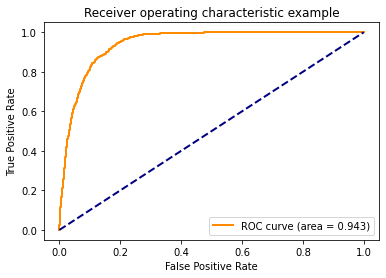

In [59]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [60]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin', 'job_bluecollar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_selfemployed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic',
       'education_highschool', 'education_illiterate',
       'education_professionalcourse', 'education_universitydegree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

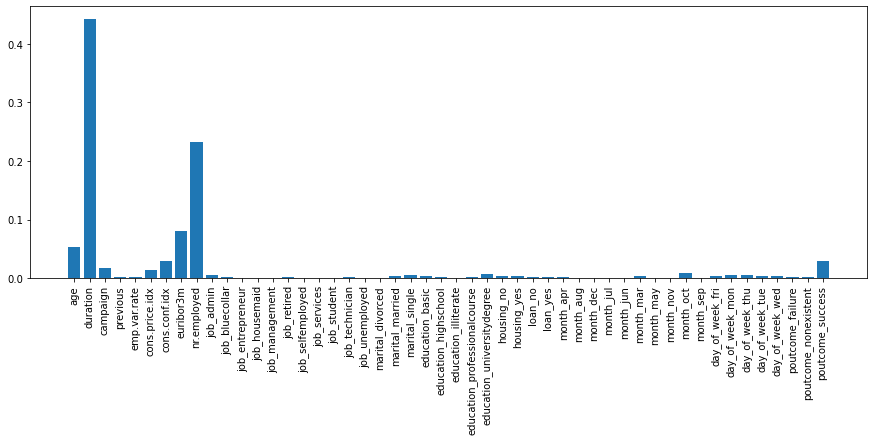

In [61]:
plt.figure(figsize=(15,5))
plt.bar(X.columns,rfm_gsmodel_result.best_estimator_.feature_importances_)
plt.xticks(X.columns,rotation='vertical')
plt.show()

<a id="connect-26"></a>
## Conclusion
<img src="https://bl.thgim.com/money-and-banking/ti94vq/article27109100.ece/alternates/LANDSCAPE_435/bl13coinsgrowthpix"></img><br>
From our extensive analysis, we have learnt many things. <br>

Top take aways are:<br>
- Duration has a huge impact on the outcome. The more the customer is engaged, the more the probability he/she would make a deposit.<br>
- The state of the country's economy plays a huge role. The better the economy the more willing are customers to make a deposit. So campaigns should be targeted during this period. October being one of the bad months with highest fluctuations in the economic status of country, campaigns in such months should be avoided.<br>
- People in blue-collor jobs, admins, technitians are more probable to make a deposit.<br>
- Customers with good background education are more likely to do well financially and would have the mind set to save. University degree or higher degree holders are more likely to deposit.<br>

<a id="connect-27"></a>
## Bonus Model

In [62]:
# #Bonus SVM Models - COMMENTED BECAUSE OF HIGH EXECUTION TIME
# from sklearn.svm import SVC
# x_discarded, x_chosen, y_discarded, y_chosen = train_test_split(X,y,test_size=0.1,random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x_chosen,y_chosen,test_size=0.25,random_state=42)
# #Linear svm
# svc_linear = SVC(kernel='linear', gamma='auto')
# svc_linear.fit(x_train,y_train)
# svc_linear_y_pred = svc_linear.predict(x_test)
# print('linear: %s' %(accuracy_score(svc_linear_y_pred,y_test)))
# #quadratic svm 
# svc_quadratic = SVC(kernel='poly',degree=2, gamma='auto')
# svc_quadratic.fit(x_train,y_train)
# svc_quadratic_y_pred = svc_quadratic.predict(x_test)
# print('quadratic: %s' %(accuracy_score(svc_quadratic_y_pred,y_test)))
# #cubic svm
# svc_cubic = SVC(kernel='poly',degree=3, gamma='auto')
# svc_cubic.fit(x_train,y_train)
# svc_cubic_y_pred = svc_cubic.predict(x_test)
# print('cubic: %s' %(accuracy_score(svc_cubic_y_pred,y_test)))